<a href="https://colab.research.google.com/github/klinkzsweet/PCVK_Genap_2023/blob/main/Utsweek2%265.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 2**

In [ ]:
from google.colab import drive

#Accessing My Goole Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


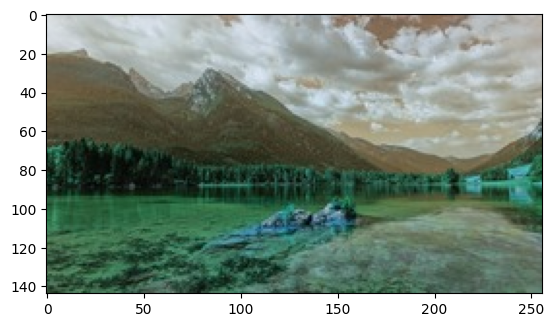

In [ ]:
import numpy as np 
import pandas as pd 
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io 
from skimage import transform 
from PIL import Image as im
import matplotlib.pylab as plt
import glob
import math
import os
from math import log10, sqrt

img = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')
plt.imshow(img) #perhatikan hasilnya adalah citra dgn channel 

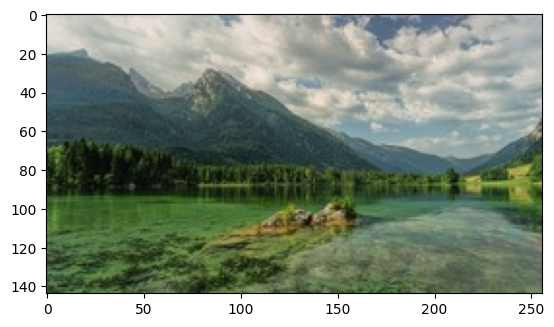

In [ ]:
img2 = img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB) #konversi channel BGR -> RGB
plt.imshow(img3)

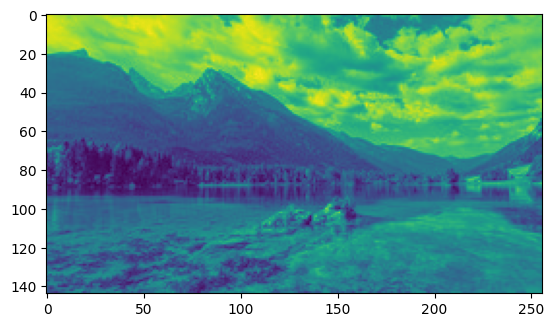

In [ ]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

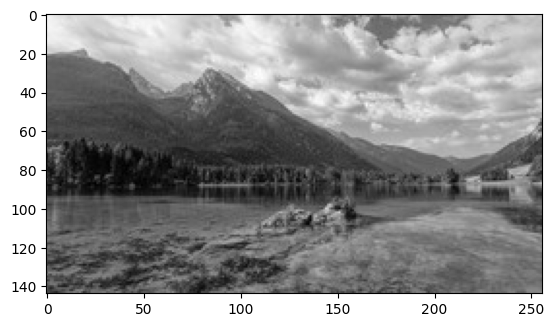

In [ ]:
plt.imshow(img_gray, cmap='gray')

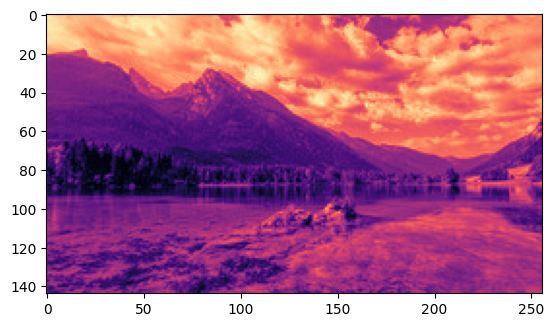

In [ ]:
plt.imshow(img_gray, cmap='magma')

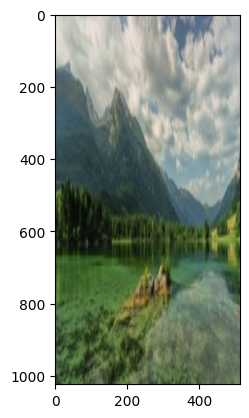

In [ ]:
#Mengubah ukuran gambar (L,T)
img4 = cv.resize(cv.cvtColor(img,cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

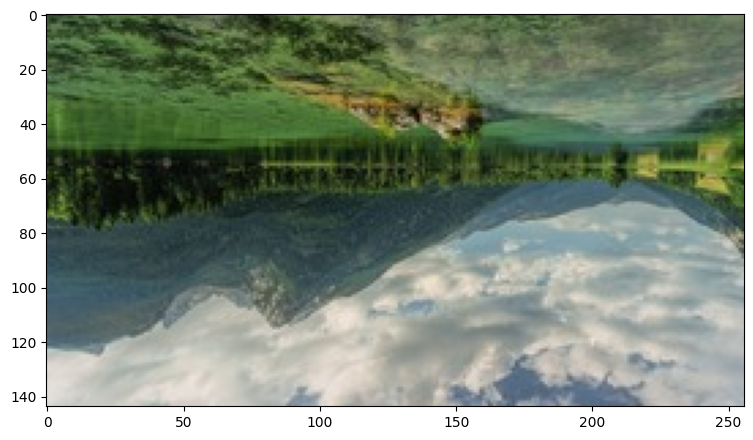

In [ ]:
img5 = cv.flip(cv.cvtColor(img,cv.COLOR_BGR2RGB),0)

#tampilkan plot dengan ukuran canvas yg lebih besar
fig = plt.figure(figsize=(9,9))   #ubah-ubah ukuran (10,10) sesuai kebutuhan
ax = fig.add_subplot(111)
ax.imshow(img5)

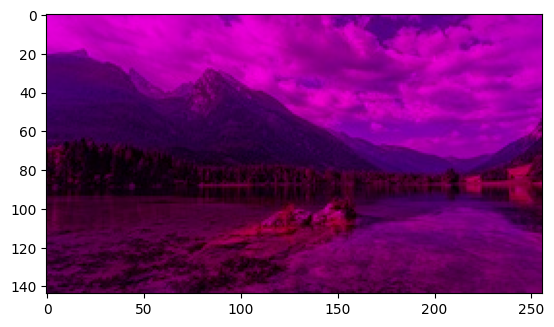

In [ ]:
#Red-Blue
image = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

#Pemisahan gambar biru, merah dan hijau cahnnel
b,g,r = cv.split(image)
# membuat variable baru new_image dengan red channel dan blue channel
new_image = cv.merge((r,g*0,b))

plt.imshow(new_image)

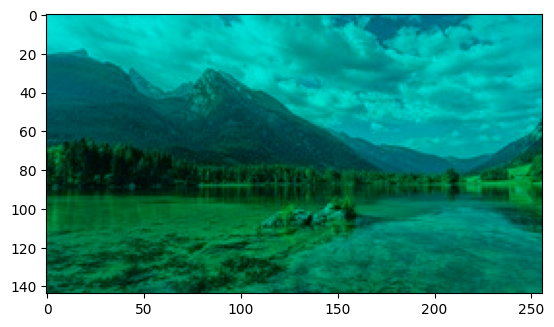

In [ ]:
#Green-Blue
image = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

#Pemisahan gambar biru, merah dan hijau cahnnel
b,g,r = cv.split(image)
# membuat variable baru new_image dengan green channel dan blue channel
new_image = cv.merge((r*0,g,b))

plt.imshow(new_image)

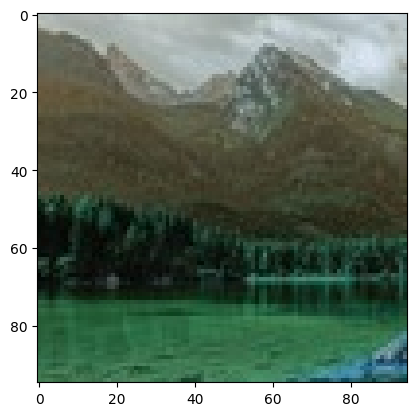

In [ ]:
#Baris ke 20-115, kolom 25-120!
image = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')
plt.imshow(image[20:115,25:120])

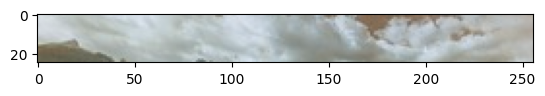

In [ ]:
#Menampilkan baris 5:30 dengan red channel saja 
image = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')
plt.imshow(image[5:30],cmap='Reds')

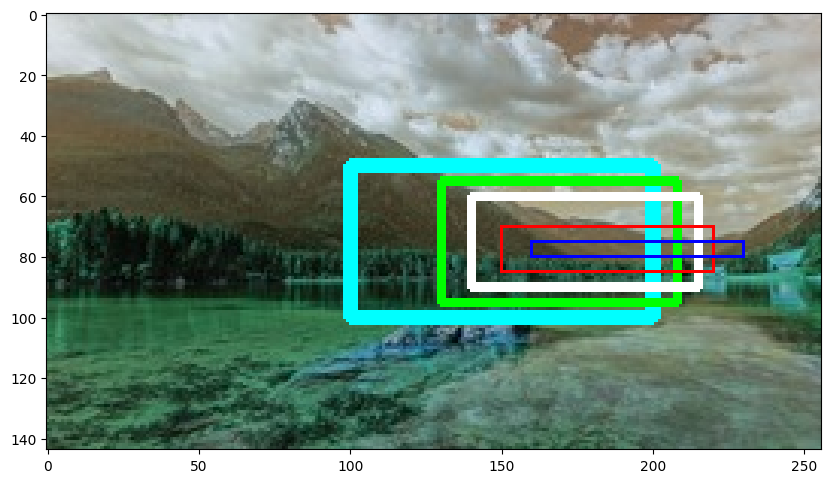

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

imageWithRectangle = img

fig = plt.figure(figsize=(10,10))
cv.rectangle(imageWithRectangle, pt1=(200,100), pt2=(100,50), color=(0,255, 255), thickness = 3)
cv.rectangle(imageWithRectangle, pt1=(208,95), pt2=(130,55), color=(0,255,0), thickness = 2)
cv.rectangle(imageWithRectangle, pt1=(215,90), pt2=(140,60), color=(255,255,255), thickness = 2)
cv.rectangle(imageWithRectangle, pt1=(220,85), pt2=(150,70), color=(255,0,0), thickness = 1)
cv.rectangle(imageWithRectangle, pt1=(230,75), pt2=(160,80), color=(0,0,255),thickness= 1)

plt.imshow(imageWithRectangle)

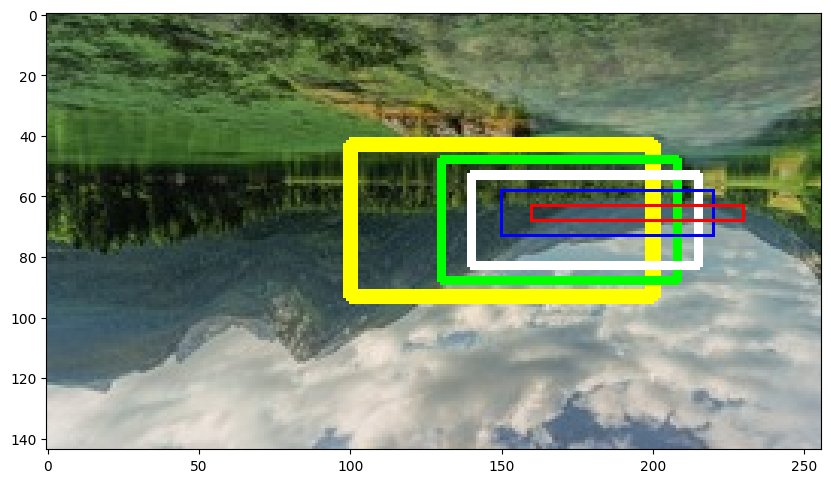

In [ ]:
imageWithRectangle = cv.flip(cv.cvtColor(imageWithRectangle,cv.COLOR_BGR2RGB),0)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(imageWithRectangle)

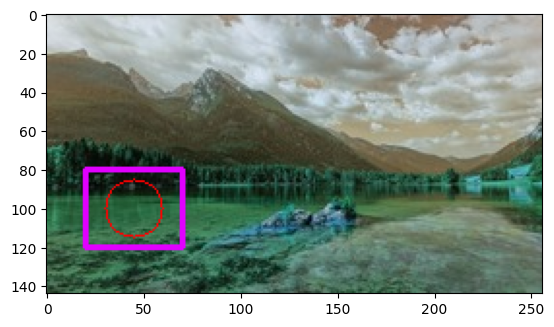

In [ ]:
# Membuat rectangle dan circle
image1 = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

cv.rectangle(image1, pt1=(70,120), pt2 = (20,80), color= (225,0,255), thickness=2)
cv.circle(image1, center=(45,100),radius=15, color= (255,0,0), thickness=1)

plt.imshow(image1)

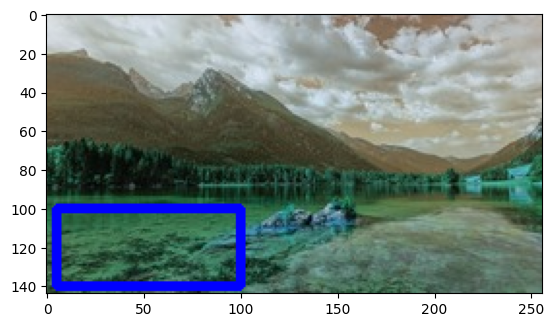

In [ ]:
#Membuat rectangle pada sisi kiri bawah gambar
image1 = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

cv.rectangle(image1, pt1=(100,140), pt2 = (5,100), color= (0,0,255), thickness=3)

plt.imshow(image1)

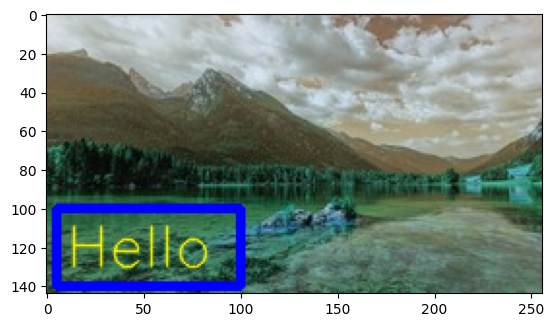

In [ ]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(image1, text='Hello', org=(10,130),fontFace=font,fontScale=1,color=(255,255,0),thickness=1,lineType=cv.LINE_AA) #cv.LINE_AA yang menghasilkan garis yang lebih halus
plt.imshow(image1)

**Week5**

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 2


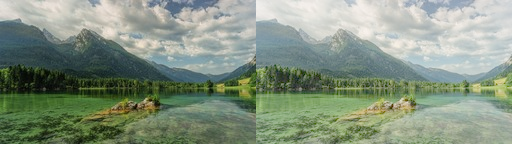

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 3


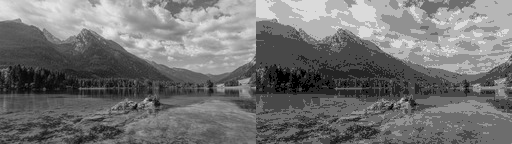

In [ ]:
print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)
original = cv.imread("/content/drive/MyDrive//PCVK/images/pemandangan.jpg", cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

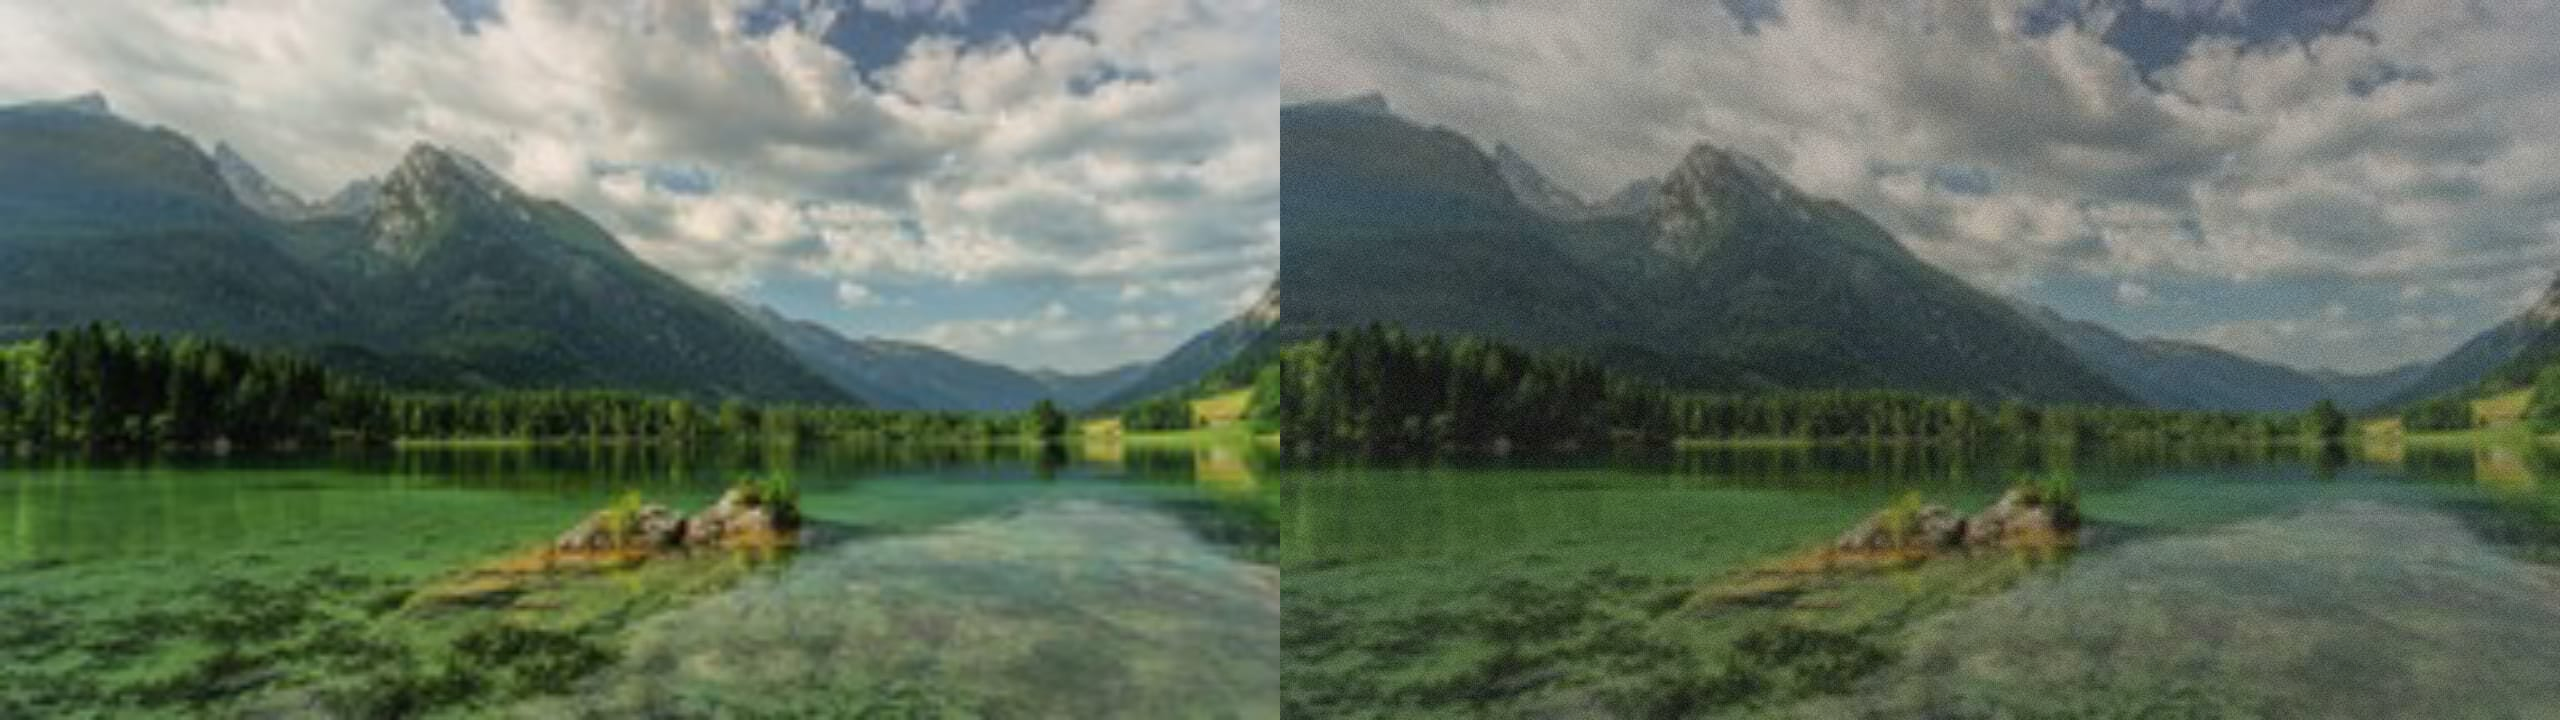

Nilai PSNR adalah 28.665246007134392 (dB)
Nilai MSE adalah 88.42106879340278


In [ ]:
original = cv.imread('/content/drive/MyDrive/PCVK/images/uts/pmndgnasli.jpg')
cv_img = []
for img in glob.glob('//content/drive/MyDrive/PCVK/images/uts/*.jpg'):
 n= cv.imread(img)
 cv_img.append(n)


first_index = cv_img[0]
noise_number = 14 # nomor (array) gambar pada folder noises

for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        first_index = cv.addWeighted(cv_img[i], alpha, first_index, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0): 
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr, mse


compressed = first_index
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, first_index))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah',psnr, '(dB)')
print('Nilai MSE adalah',mse)

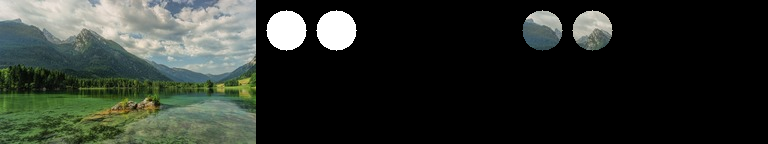

In [ ]:
#Membuat masking image
img_mask = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

mask = np.zeros(img_mask.shape, img_mask.dtype)
mask = cv.circle(mask, (30, 30), 20, (255,255,255),-1)

result = img_mask & mask
mask1 = cv.circle(mask, (80, 30), 20, (255,255,255),-1)

result = img_mask & mask

final_frame = cv.hconcat((img_mask, mask, result))
cv2_imshow(final_frame)

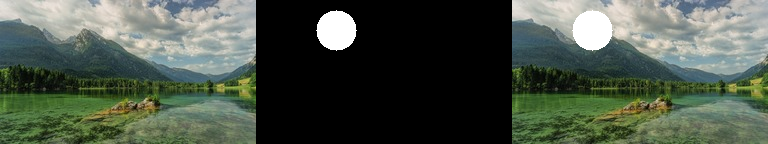

In [ ]:
#OR
img_or = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

mask = np.zeros(img_or.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 30), 20, (255,255,255), -1)

masked = img_or | mask

rose_frame = cv.hconcat((img_or, mask, masked))
cv2_imshow(rose_frame)

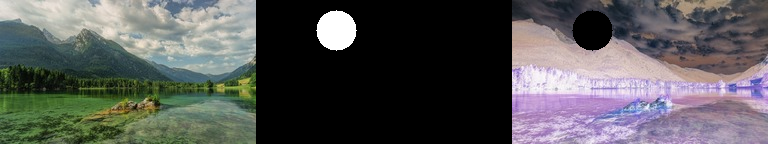

In [ ]:
#NOT
img_not = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

mask = np.zeros(img_not.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 30), 20, (255,255,255), -1)

masked = ~img_not & ~mask

rose_frame = cv.hconcat((img_not, mask, masked))
cv2_imshow(rose_frame)

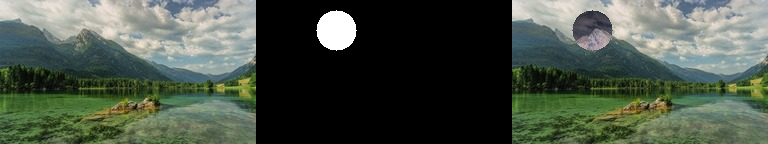

In [ ]:
#NAND
img_nand = cv.imread('/content/drive/MyDrive/PCVK/images/pemandangan.jpg')

mask = np.zeros(img_nand.shape, dtype=np.uint8)
mask = cv.circle(mask, (80, 30), 20, (255,255,255), -1)

masked = img_nand ^ mask

rose_frame = cv.hconcat((img_nand, mask, masked))
cv2_imshow(rose_frame)